<h1> MIDS W207 Final</h1>

<h3> Group Members </h3>
Ben Attix <br>
Justin Plumley <br>
Dan Watson

<h3> Kaggle Competition </h3>
Zillow Prize: Zillow’s Home Value Prediction (Zestimate)

<h3> Evaluation </h3>
Submissions are evaluated on Mean Absolute Error between the predicted log error and the actual log error. The log error is defined as:
logerror=log(Zestimate)−log(SalePrice)
and it is recorded in the transactions training data. If a transaction didn't happen for a property during that period of time, that row is ignored and not counted in the calculation of MAE.

<h5> Competition Website </h5>
https://www.kaggle.com/c/zillow-prize-1#description

<h2> Load libraries, data, and test output

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# General libraries.
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()
import time

In [2]:
train_csv = pd.read_csv("train_2016_v2.csv", parse_dates=["transactiondate"])
prop_df = pd.read_csv("properties_2016.csv")
print prop_df.shape 
print train_csv.shape
#df outputs
#prop_df.head()
#train_csv.head()

(2985217, 58)
(90275, 3)


<H2> EDA </H2> <br>
Many ideas and code taken from following EDA Kernels:
https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-zillow-prize (python)
https://www.kaggle.com/philippsp/exploratory-analysis-zillow (R)
https://www.kaggle.com/captcalculator/a-very-extensive-zillow-exploratory-analysis (R)
https://www.kaggle.com/viveksrinivasan/zillow-eda-on-missing-values-multicollinearity (python)

<H5> Start by looking at the parcelIDs that occur in each dataset </H5>

In [3]:
# df = df.drop('column_name', 1)
to_drop = ['architecturalstyletypeid'
           ,'assessmentyear'
           ,'bathroomcnt'
           ,'buildingclasstypeid'
           ,'decktypeid'
           ,'threequarterbathnbr'
           ,'finishedfloor1squarefeet'
           ,'finishedsquarefeet6'
           ,'finishedsquarefeet12'
           ,'finishedsquarefeet13'
           ,'finishedsquarefeet15'
           ,'finishedsquarefeet50'
           ,'fireplaceflag'
           ,'fullbathcnt'
           ,'garagetotalsqft'
           ,'latitude'
           ,'longitude'
           ,'poolsizesum'
           ,'propertyzoningdesc'
           ,'rawcensustractandblock'
           ,'censustractandblock'
           ,'regionidzip'
           ,'storytypeid'
           ,'typeconstructiontypeid'
           ,'taxvaluedollarcnt'
           ,'taxamount'
           ,'taxdelinquencyyear'
           ,'fips'
           
           ,'hashottuborspa'
           ,'pooltypeid10'
           ,'pooltypeid2'
           ,'pooltypeid7'
               
           ,'propertycountylandusecode'   # 241 unique values, cannot dummy for size reasons          
           ,'regionidcity'            # 187 unique values, cannot dummy for size reasons
           ,'regionidneighborhood'    # 529 unique values, cannot dummy for size reasons
          ]

for col in to_drop:
    prop_df = prop_df.drop(col,1)

In [4]:
## airconditioningtypeid
prop_df['airconditioningtypeid'].fillna(value='missing',inplace=True)

## bedroomcnt
a = np.array(prop_df['bedroomcnt'].values.tolist())
prop_df['bedroomcnt'] = np.where(a > 6, 6, a).tolist()
prop_df['bedroomcnt'].fillna(value=3,inplace=True) # Or maybe impute with most_common, which is 3

In [5]:

## buildingqualitytypeid (best=lowest, worse=highest)

a = np.array(prop_df['buildingqualitytypeid'].values.tolist())
prop_df['buildingqualitytypeid'] = np.where(a < 4,  4, a)  #.tolist()
a = np.array(prop_df['buildingqualitytypeid'].values.tolist())
prop_df['buildingqualitytypeid'] = np.where(a > 7, 10, a)  #.tolist()
a = np.array(prop_df['buildingqualitytypeid'].values.tolist())
prop_df['buildingqualitytypeid'] = np.where(a == 5, 7, a)  #.tolist()
a = np.array(prop_df['buildingqualitytypeid'].values.tolist())
prop_df['buildingqualitytypeid'] = np.where(a == 6, 7, a).tolist()
a = np.array(prop_df['buildingqualitytypeid'].values.tolist())
prop_df['buildingqualitytypeid'].fillna(value=99,inplace=True) # 99 = missing (BE CAREFUL NOT TO CHANGE BEFORE '>' STATEMENT)


In [6]:

## fireplacecnt
a = np.array(prop_df['fireplacecnt'].values.tolist())
prop_df['fireplacecnt'] = np.where(a > 3,  3, a)  #.tolist()
prop_df['fireplacecnt'].fillna(value=0,inplace=True) #set NaN to zero

## garagecarcnt
a = np.array(prop_df['garagecarcnt'].values.tolist())
prop_df['garagecarcnt'] = np.where(a > 3,  3, a)  #.tolist()
prop_df['garagecarcnt'].fillna(value=99,inplace=True) #set NaN to 99


## heatingorsystemtypeid
a = np.array(prop_df['heatingorsystemtypeid'].values.tolist())
prop_df['heatingorsystemtypeid'] = np.where(a == 19,  14, a)  #.tolist()
a = np.array(prop_df['heatingorsystemtypeid'].values.tolist())
prop_df['heatingorsystemtypeid'] = np.where(a == 21, 14, a)  #.tolist()
a = np.array(prop_df['heatingorsystemtypeid'].values.tolist())
prop_df['heatingorsystemtypeid'] = np.where(a == 11, 14, a)  #.tolist()
a = np.array(prop_df['heatingorsystemtypeid'].values.tolist())
prop_df['heatingorsystemtypeid'] = np.where(a == 12, 14, a)  #.tolist()
a = np.array(prop_df['heatingorsystemtypeid'].values.tolist())
prop_df['heatingorsystemtypeid'] = np.where(a == 10, 14, a)  #.tolist()
a = np.array(prop_df['heatingorsystemtypeid'].values.tolist())
prop_df['heatingorsystemtypeid'] = np.where(a ==  1, 14, a)  #.tolist()
a = np.array(prop_df['heatingorsystemtypeid'].values.tolist())
prop_df['heatingorsystemtypeid'] = np.where(a == 18, 14, a)  #.tolist()
a = np.array(prop_df['heatingorsystemtypeid'].values.tolist())
prop_df['heatingorsystemtypeid'] = np.where(a == 13, 14, a)  #.tolist()
a = np.array(prop_df['heatingorsystemtypeid'].values.tolist())
prop_df['heatingorsystemtypeid'] = np.where(a == 20, 14, a)  #.tolist()
a = np.array(prop_df['heatingorsystemtypeid'].values.tolist())
prop_df['heatingorsystemtypeid'] = np.where(a == 12, 14, a).tolist()
a = np.array(prop_df['heatingorsystemtypeid'].values.tolist())

prop_df['heatingorsystemtypeid'].fillna(value=99,inplace=True) #set NaN to 99

In [7]:


## numberofstories
a = np.array(prop_df['numberofstories'].values.tolist())
prop_df['numberofstories'] = np.where(a > 3,  3, a)  #.tolist()
prop_df['numberofstories'].fillna(value=99,inplace=True) #set NaN to 99

## poolcnt
prop_df['poolcnt'].fillna(value=0,inplace=True) #set NaN to zero

## propertylandusetypeid
prop_df['propertylandusetypeid'].fillna(value=99,inplace=True) #set NaN to 99

## regionidcounty
prop_df['regionidcounty'].fillna(value=99,inplace=True) #set NaN to 99

## calculatedbathnbr
prop_df['calculatedbathnbr'].fillna(value=2,inplace=True)  # Or maybe impute with most_common, which is 2

In [8]:


## roomcnt
a = np.array(prop_df['roomcnt'].values.tolist())
prop_df['roomcnt0'] = np.where(a == 0, 1, 0)  #.tolist()
prop_df['roomcnt'] = np.where(a < 3,  3, a)  #.tolist()
a = np.array(prop_df['roomcnt'].values.tolist())
prop_df['roomcnt'] = np.where(a > 7, 10, a)  #.tolist()
a = np.array(prop_df['roomcnt'].values.tolist())
prop_df['roomcnt'] = np.where(a == 5, 7, a)  #.tolist()
a = np.array(prop_df['roomcnt'].values.tolist())
prop_df['roomcnt'] = np.where(a == 6, 7, a).tolist()
a = np.array(prop_df['roomcnt'].values.tolist())
prop_df['roomcnt'].fillna(value=6,inplace=True) #set NaN to 6, most common value


## unitcnt
a = np.array(prop_df['unitcnt'].values.tolist())
prop_df['unitcnt'] = np.where(a > 5, 5, a)  #.tolist()
prop_df['unitcnt'].fillna(value=1,inplace=True) #set NaN to 1


In [9]:

## yearbuilt    
a = np.array(prop_df['yearbuilt'].values.tolist())
prop_df['yearbuilt'] = (prop_df['yearbuilt']/10).round()
a = np.array(prop_df['yearbuilt'].values.tolist())
prop_df['yearbuilt'] = np.where(a < 190, 189, a)  #.tolist()
prop_df['yearbuilt'].fillna(value=195,inplace=True) #set NaN to 195



##  taxdelinquencyflag   prop_df['taxdelinquencyflag'].value_counts()
prop_df['taxdelinquencyflag'] = [1 if x == 'Y' else 0 for x in prop_df['taxdelinquencyflag']] 
prop_df['taxdelinquencyflag'].fillna(value=0,inplace=True) #set NaN to zeroTrue) #set NaN to zero

In [10]:
##  Numeric variables whose NaN we'll set to zero
a = np.array(prop_df['basementsqft'].values.tolist())
prop_df['basementsqft_NaN'] = np.where(a == np.NaN, 1, 0)  #.tolist()
prop_df['basementsqft'].fillna(value=0,inplace=True) #set NaN to zero

a = np.array(prop_df['calculatedfinishedsquarefeet'].values.tolist())
prop_df['calculatedfinishedsquarefeet_NaN'] = np.where(a == np.NaN, 1, 0)  #.tolist()
prop_df['calculatedfinishedsquarefeet'].fillna(value=0,inplace=True) #set NaN to zero

a = np.array(prop_df['lotsizesquarefeet'].values.tolist())
prop_df['lotsizesquarefeet_NaN'] = np.where(a == np.NaN, 1, 0)  #.tolist()
prop_df['lotsizesquarefeet'].fillna(value=0,inplace=True) #set NaN to zero

a = np.array(prop_df['yardbuildingsqft17'].values.tolist())
prop_df['yardbuildingsqft17_NaN'] = np.where(a == np.NaN, 1, 0)  #.tolist()
prop_df['yardbuildingsqft17'].fillna(value=0,inplace=True) #set NaN to zero
a = np.array(prop_df['yardbuildingsqft17'].values.tolist())
prop_df['yardbuildingsqft17'] = np.where(a > 0, 1, 0)  #.tolist()

a = np.array(prop_df['yardbuildingsqft26'].values.tolist())
prop_df['yardbuildingsqft26_NaN'] = np.where(a == np.NaN, 1, 0)  #.tolist()
prop_df['yardbuildingsqft26'].fillna(value=0,inplace=True) #set NaN to zero
a = np.array(prop_df['yardbuildingsqft26'].values.tolist())
prop_df['yardbuildingsqft26'] = np.where(a > 0, 1, 0)  #.tolist()

a = np.array(prop_df['structuretaxvaluedollarcnt'].values.tolist())
prop_df['structuretaxvaluedollarcnt_NaN'] = np.where(a == np.NaN, 1, 0)  #.tolist()
prop_df['structuretaxvaluedollarcnt'].fillna(value=0,inplace=True) #set NaN to zero

a = np.array(prop_df['landtaxvaluedollarcnt'].values.tolist())
prop_df['landtaxvaluedollarcnt_NaN'] = np.where(a == np.NaN, 1, 0)  #.tolist()
prop_df['landtaxvaluedollarcnt'].fillna(value=10000,inplace=True) #set NaN to 10000

a = np.array(prop_df['calculatedfinishedsquarefeet'].values.tolist())
prop_df['calculatedfinishedsquarefeet_NaN'] = np.where(a == np.NaN, 1, 0)  #.tolist()
prop_df['calculatedfinishedsquarefeet'].fillna(value=6000,inplace=True) #set NaN to 6000, most common number



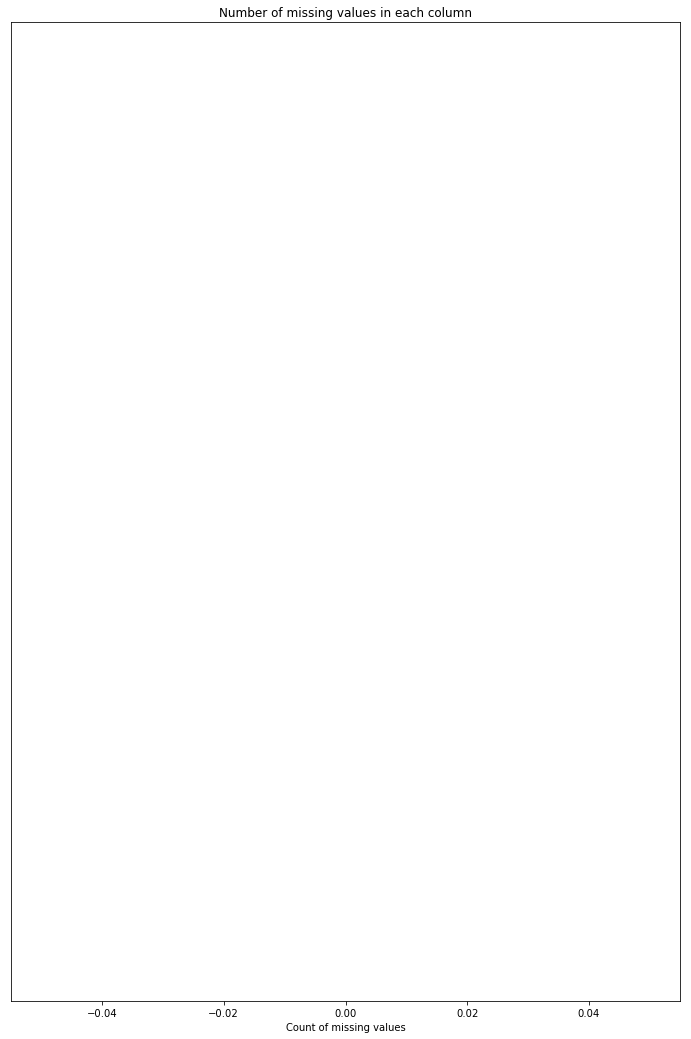

In [13]:
# Check Missing values again, after processing attempt to remove some fields and assign a value to others' NaN values
missing_df = prop_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [14]:

objs = [ 'airconditioningtypeid'
        ,'bedroomcnt'
        ,'buildingqualitytypeid'
        ,'fireplacecnt'
        ,'garagecarcnt'
        ,'heatingorsystemtypeid'
        ,'numberofstories'
        ,'poolcnt'        
        ,'propertylandusetypeid'   
        ,'regionidcounty'
        ,'unitcnt'
        ,'yearbuilt'   
        ,'taxdelinquencyflag'  
        ,'yardbuildingsqft17'
        ,'yardbuildingsqft26'        
        ]


for obj in objs:
    prop_df[obj] = prop_df[obj].astype(object)

In [15]:

flts = [ 'basementsqft'
        ,'calculatedbathnbr'
        ,'calculatedfinishedsquarefeet'
        ,'landtaxvaluedollarcnt'
        ,'lotsizesquarefeet'
        ,'roomcnt'
        ,'structuretaxvaluedollarcnt'
       ]

for flt in flts:
    prop_df[flt] = prop_df[flt].astype(float)

In [16]:
# Decide which categorical variables you want to use in model
for col in prop_df.columns:
    if prop_df[col].dtypes == 'object':       
        unique_cat = len(prop_df[col].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col, unique_cat=unique_cat))

Feature 'airconditioningtypeid' has 8 unique categories
Feature 'bedroomcnt' has 7 unique categories
Feature 'buildingqualitytypeid' has 4 unique categories
Feature 'fireplacecnt' has 4 unique categories
Feature 'garagecarcnt' has 5 unique categories
Feature 'heatingorsystemtypeid' has 6 unique categories
Feature 'poolcnt' has 2 unique categories
Feature 'propertylandusetypeid' has 16 unique categories
Feature 'regionidcounty' has 4 unique categories
Feature 'unitcnt' has 5 unique categories
Feature 'yardbuildingsqft17' has 2 unique categories
Feature 'yardbuildingsqft26' has 2 unique categories
Feature 'yearbuilt' has 14 unique categories
Feature 'numberofstories' has 4 unique categories
Feature 'taxdelinquencyflag' has 2 unique categories


In [17]:
# Create dummy list
to_dummy = [ 'airconditioningtypeid'
            ,'bedroomcnt'
            ,'buildingqualitytypeid'
            ,'fireplacecnt'
            ,'garagecarcnt'
            ,'heatingorsystemtypeid'
            ,'numberofstories'
            ,'poolcnt'
            ,'propertylandusetypeid'   
            ,'regionidcounty'         
            ,'unitcnt'
            ,'yearbuilt'   
            ,'taxdelinquencyflag'  
            ,'yardbuildingsqft17'
            ,'yardbuildingsqft26'   
            ]

In [18]:
# Use this function to dummy all the categorical variables we want to keep
def dummy_df(df, todummy_list):
    for x in todummy_list:       
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=True)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [19]:
## bool  
prop_df = dummy_df(prop_df, to_dummy)

In [20]:
prop_df.head()

,parcelid,basementsqft,calculatedbathnbr,calculatedfinishedsquarefeet,lotsizesquarefeet,roomcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,roomcnt0,basementsqft_NaN,...,yearbuilt_nan,taxdelinquencyflag_0.0,taxdelinquencyflag_1.0,taxdelinquencyflag_nan,yardbuildingsqft17_0.0,yardbuildingsqft17_1.0,yardbuildingsqft17_nan,yardbuildingsqft26_0.0,yardbuildingsqft26_1.0,yardbuildingsqft26_nan
0,10754147,0.0,2.0,0.0,85768.0,3.0,0.0,9.0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,10759547,0.0,2.0,0.0,4083.0,3.0,0.0,27516.0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,10843547,0.0,2.0,73026.0,63085.0,3.0,650756.0,762631.0,1,0,...,0,1,0,0,1,0,0,1,0,0
3,10859147,0.0,2.0,5068.0,7521.0,3.0,571346.0,585488.0,1,0,...,0,1,0,0,1,0,0,1,0,0
4,10879947,0.0,2.0,1776.0,8512.0,3.0,193796.0,239695.0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [30]:
sample_submission = pd.read_csv("sample_submission.csv")
sample_submission.rename(columns={'ParcelId': 'parcelid'}, inplace=True)
print sample_submission.shape
print prop_df.shape
print sample_submission.head()

(2985217, 7)
(2985217, 116)
   parcelid  201610  201611  201612  201710  201711  201712
0  10754147       0       0       0       0       0       0
1  10759547       0       0       0       0       0       0
2  10843547       0       0       0       0       0       0
3  10859147       0       0       0       0       0       0
4  10879947       0       0       0       0       0       0


In [27]:
# inner merge with sample_submission to ensure we use the correct parcelIds in our submission
properties_to_use = pd.merge(prop_df, sample_submission, on='parcelid', how='inner')
print 'Dataframe shape:', properties_to_use.shape

Dataframe shape: (2985217, 122)


In [22]:
properties_to_use.to_csv("preprocessed_properties.csv")